# Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

# Importing Dataset

In [33]:
df = pd.read_csv("SampleSuperstore.csv")

In [34]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [35]:
df.shape

(9994, 13)

## The dataset has 9994 Rows and 13 Columns

In [36]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Checking for missing values

In [37]:
df.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

#### No missing values are present

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [39]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


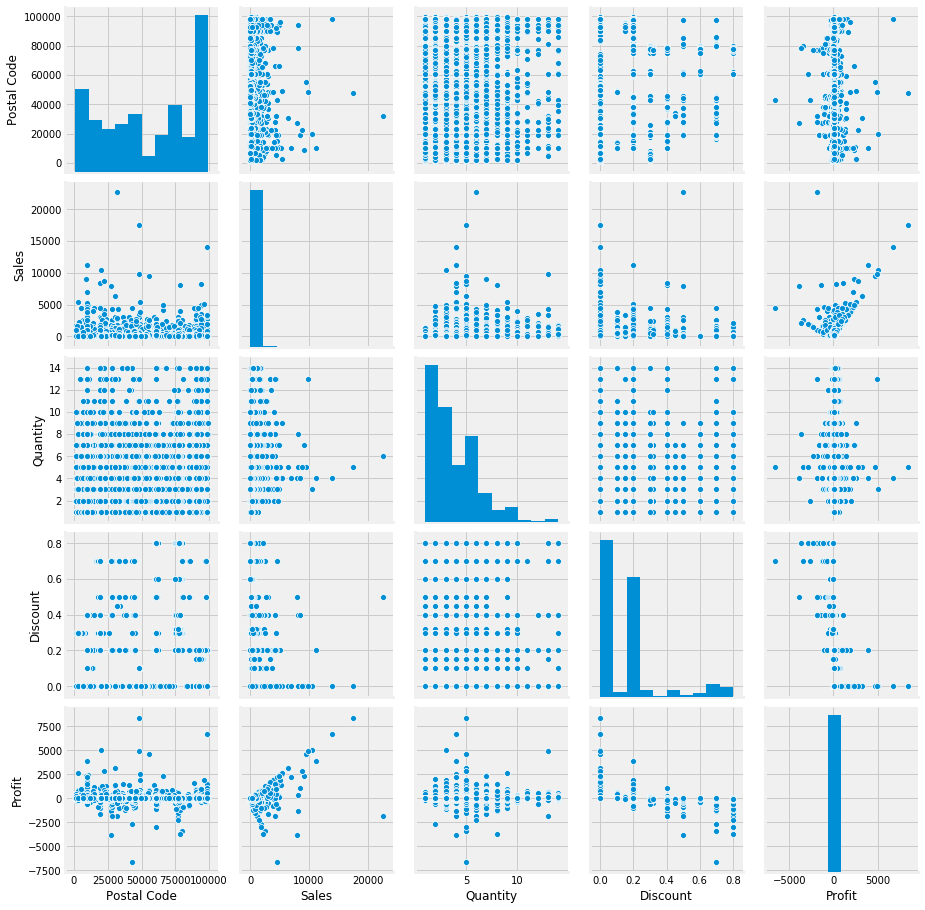

In [40]:
sns.pairplot(df)

# Heatmap dataframe

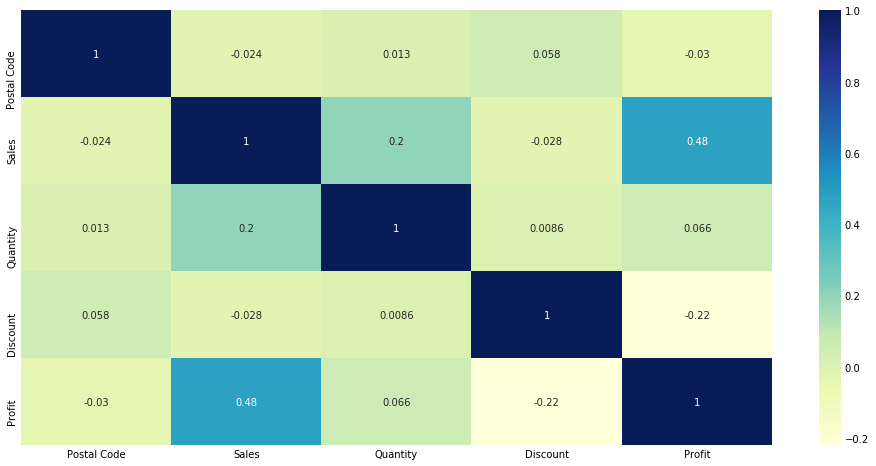

In [41]:
#sns.set(rc={'figure.figsize':(15.0,8.0)})
plt.figure(figsize=(15,8))

sns.heatmap(df.corr(), annot= True, cmap="YlGnBu")


# Pairplot Ship Mode

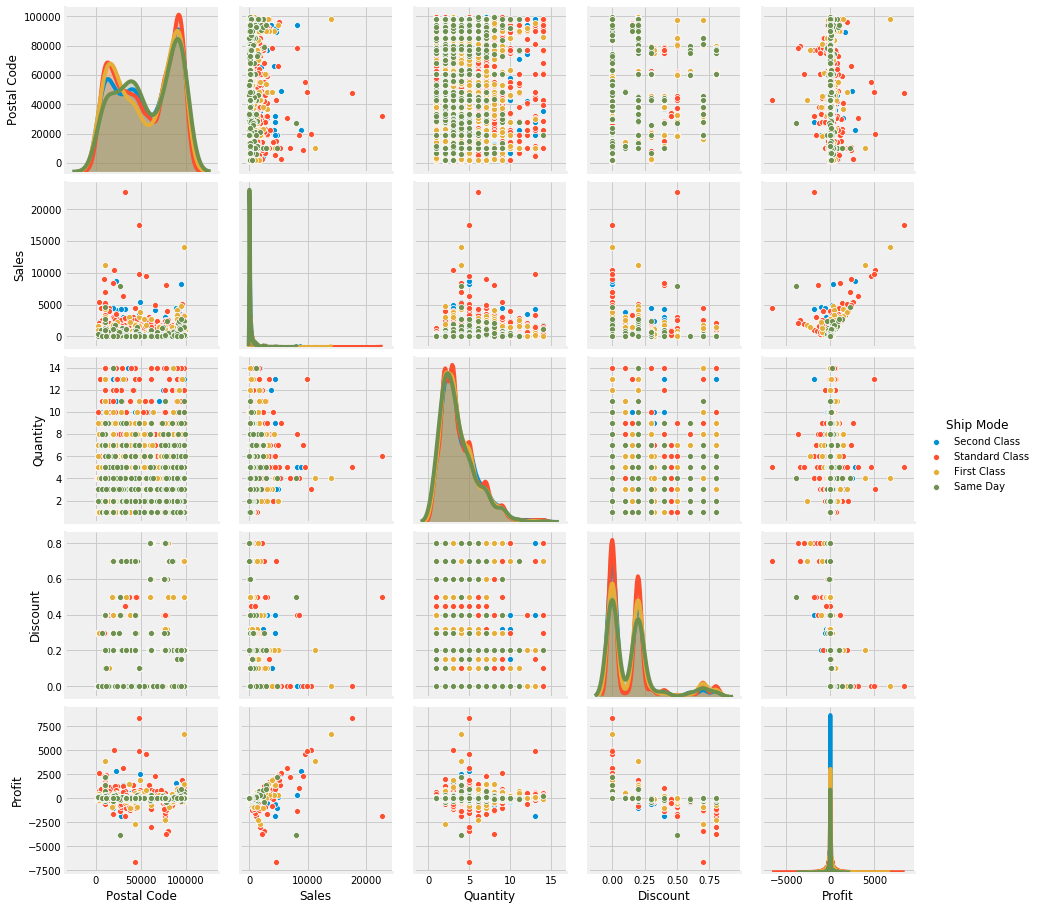

In [42]:
sns.pairplot(df, hue = 'Ship Mode')

# Segment and Ship mode

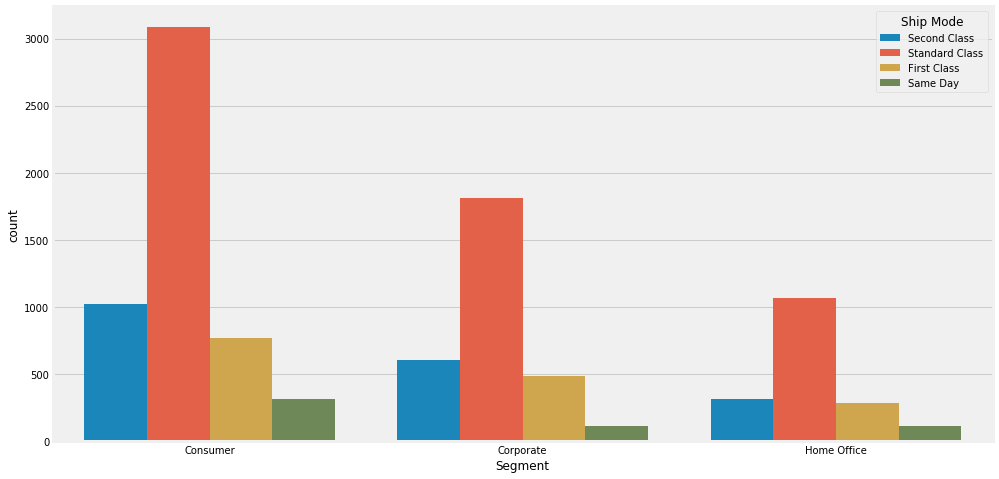

In [43]:
plt.figure(figsize=(15, 8))
sns.countplot(data = df, x = 'Segment', hue = 'Ship Mode')

#### Observation 1:                                                                                                                                                                                             From the above graph, it is evident that all the three Segments(Consumer, Corporate and Home Office) were likely to choose the Standard Class as their mode of shipment.

#### Also very few opted the same day delivery as shipment mode.

# State Countplot

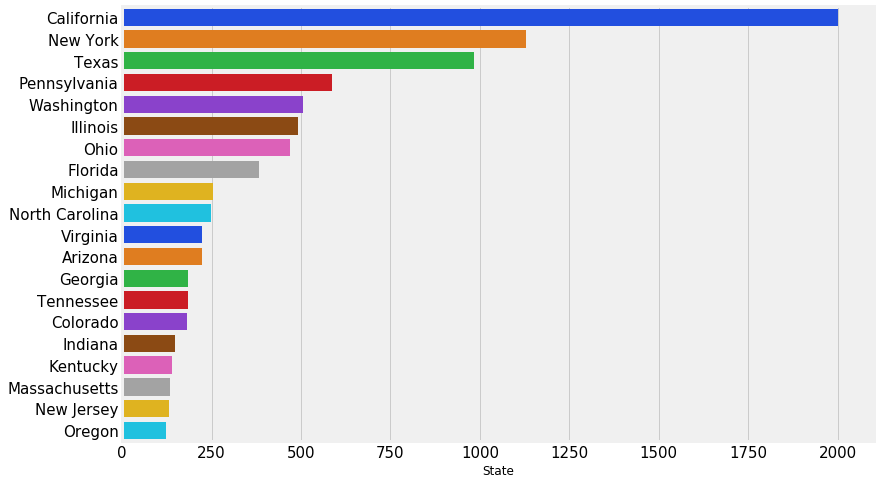

In [76]:
plt.figure(figsize=(12,8))
states=df['State'].value_counts()[0:20]
sns.barplot(x=states,y=states.index,palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Obervation 2: California has the highest number of buyers followed by New York and Texas.

# Pairplot category

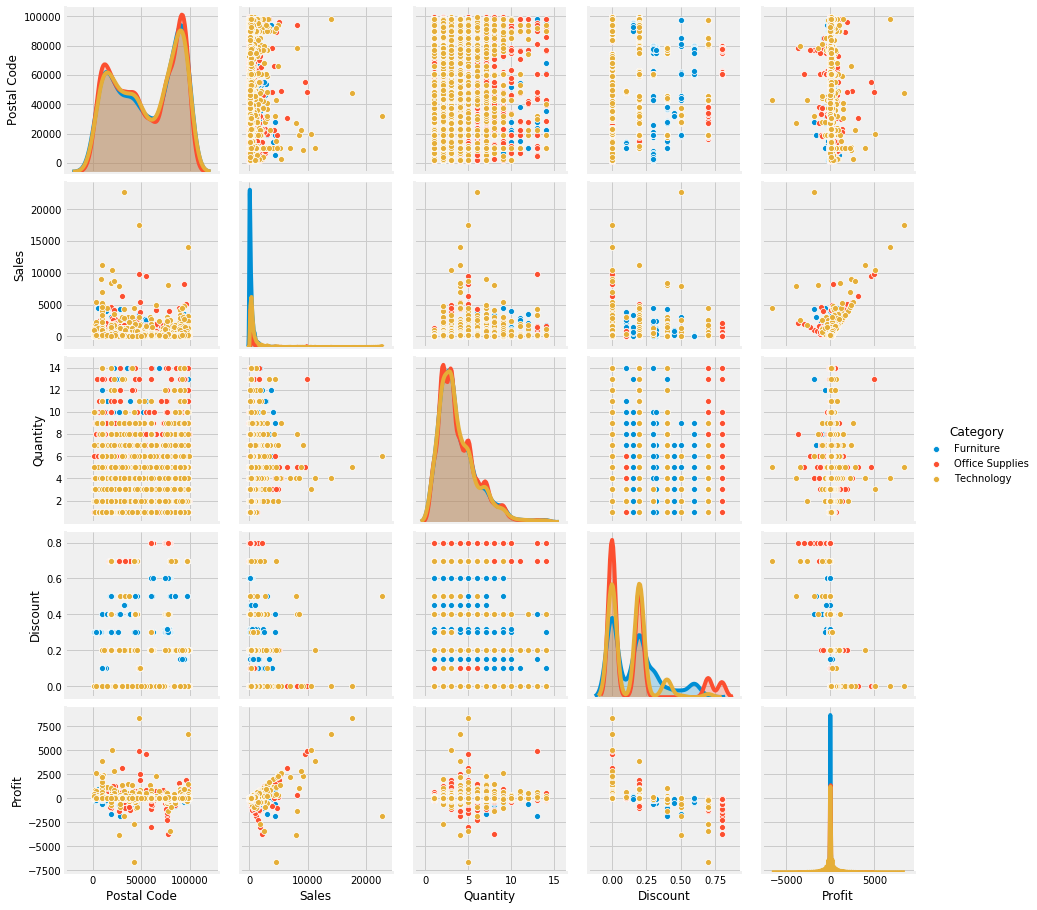

In [45]:
sns.pairplot(df, hue = 'Category')


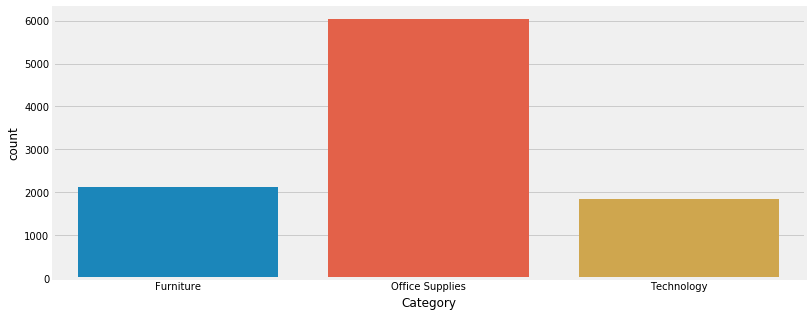

In [46]:
plt.figure(figsize=(12, 5))
sns.countplot(data = df, x = 'Category')

#### Observation 3: Office Supplies were the most chosen category

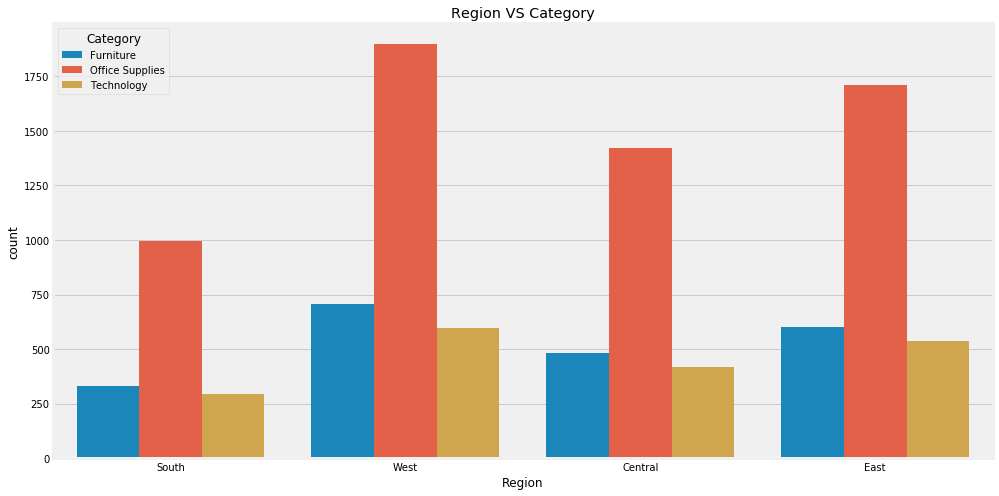

In [47]:
plt.figure(figsize=(15, 8))
sns.couhttp://localhost:8888/notebooks/GRIP_Retail.ipynb#Observation-3:-Office-Supplies-were-the-most-chosen-categoryntplot(x = 'Region',hue='Category',data= df)
plt.title('Region VS Category')
plt.show()

#### Observation 4:  Western region has the most number of Office supplies while Southern has the least.

# Sub-Category

## Pairplot Sub-Category  

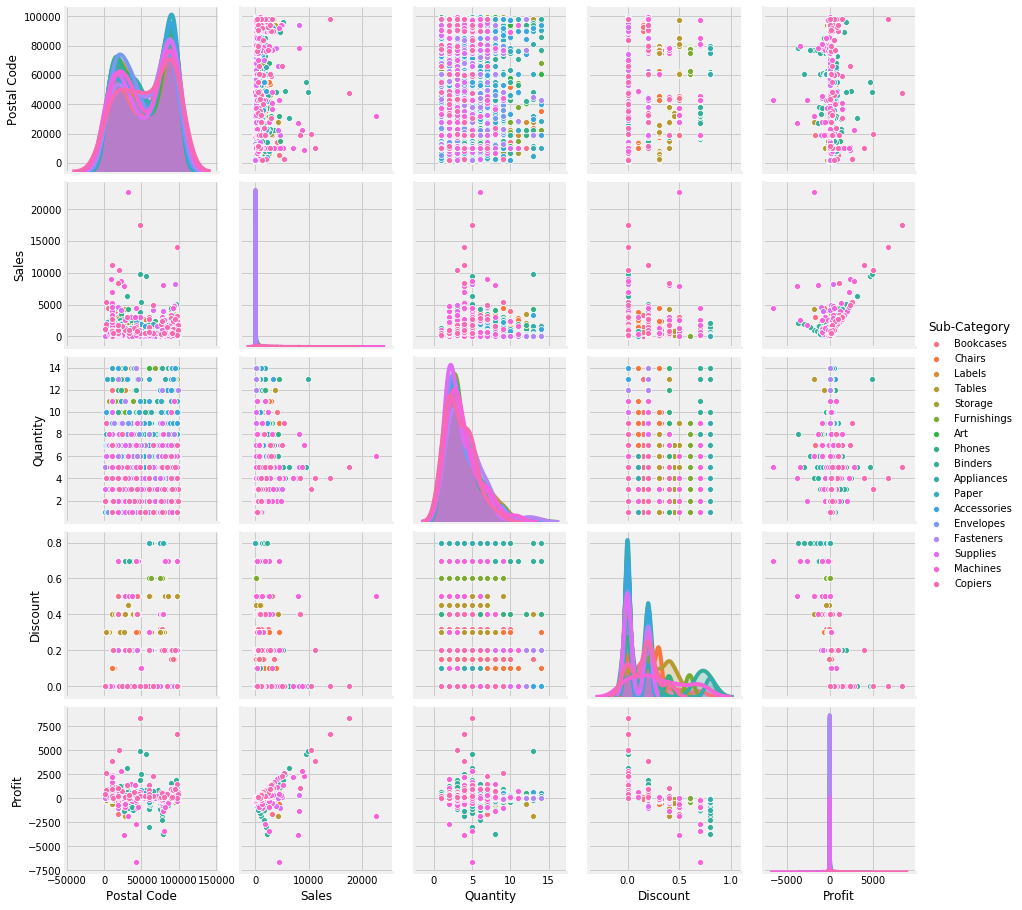

In [48]:
sns.pairplot(df, hue = 'Sub-Category')

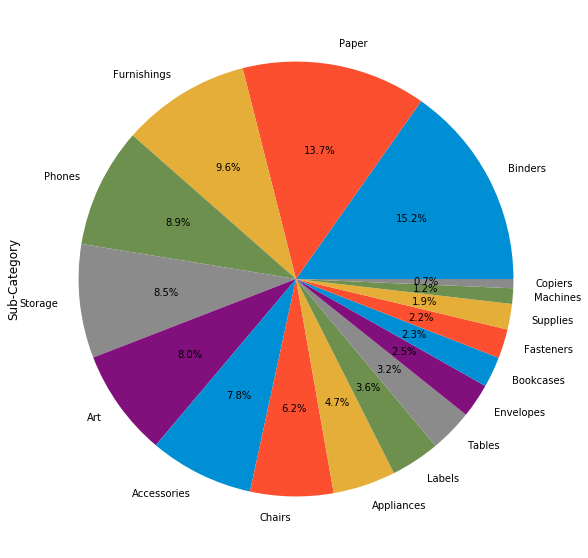

In [67]:
plt.figure(figsize = (10,10))
df['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')

#### Observation 5: Most of the sales was of Binders and Papers. 

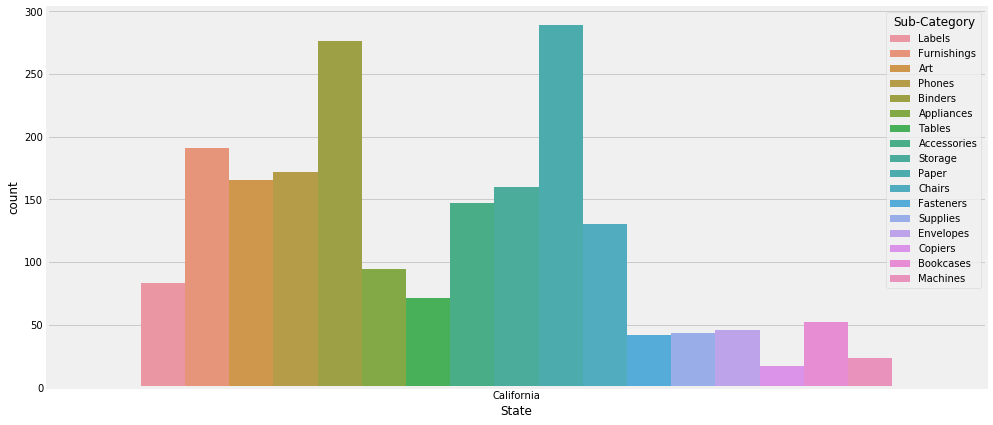

In [50]:
plt.figure(figsize = (15, 7))
df1 = df[df['State'] == 'California'][['State','Sub-Category']]
sns.countplot(df1['State'], hue = df1['Sub-Category'])

#### Observation 6: Although, Binders were most sold Sub-Category but in the State of California, It is intresting to note that Papers were most sold Sub-Category.

   #  Category and Sales

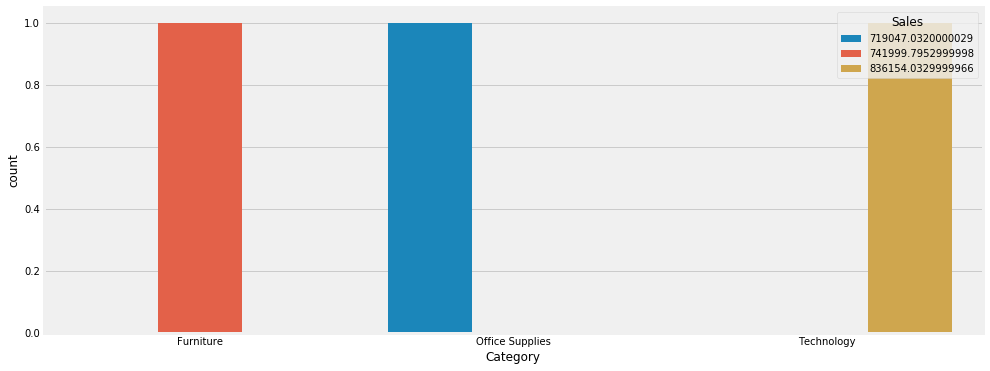

In [51]:
new_df = df.groupby(["Category"]).Sales.sum().reset_index()
plt.figure(figsize=(15, 6))
sns.countplot(x = 'Category',hue='Sales',data= new_df)


#### Observation 7: Technology Category has maximum number of Sales

# Discount and Profit

Text(0.5, 1.0, 'Discount and Profit')

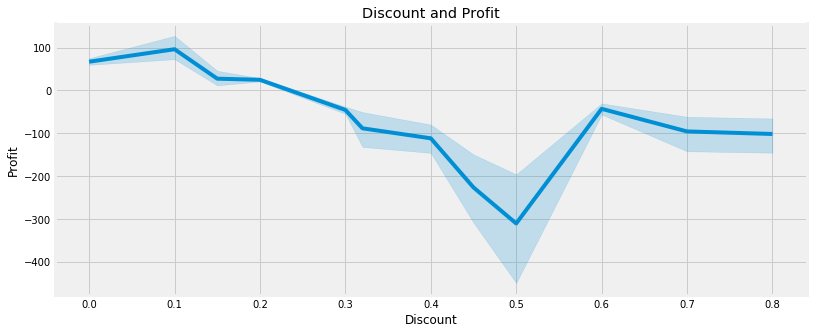

In [52]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount and Profit")

#### Observation 8: The Profit is only posivtive when the discount is less than 10%. After that, it is not profitable to sell there items with discount more than 10%.

<Figure size 576x432 with 0 Axes>

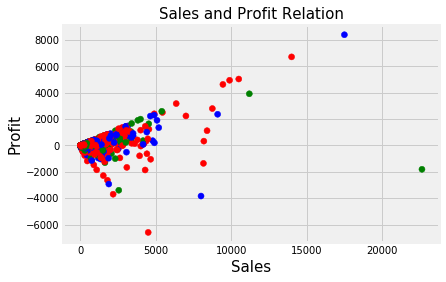

In [72]:

plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
colors = {'Consumer' : 'red', 'Corporate' : 'blue', 'Home Office' : 'green'}
ax.scatter(df['Sales'], df['Profit'], c=df['Segment'].apply(lambda x: colors[x]))
plt.xlabel("Sales", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Sales and Profit Relation", fontsize=15)
plt.show()

#### Observation 9:There is more profit in consumer segment.



Text(0.5, 1.0, 'Discount VS Sales')

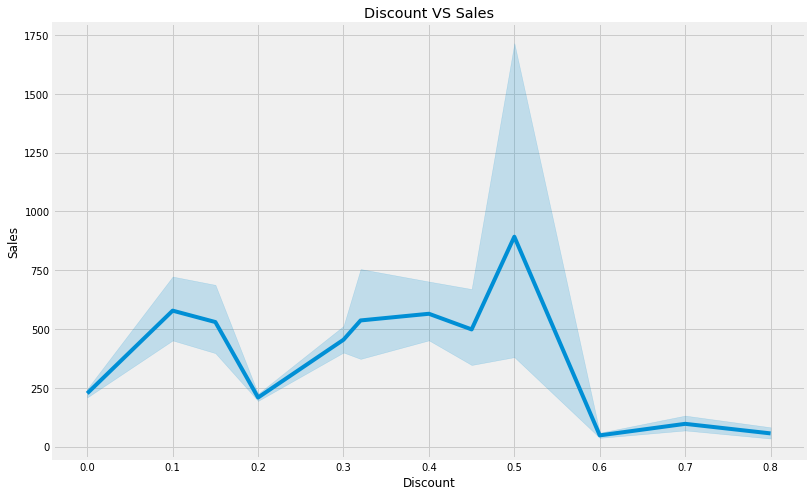

In [54]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount VS Sales')


#### Observation 10: For maximum sales, discount sholud be less than or equal to 50%.

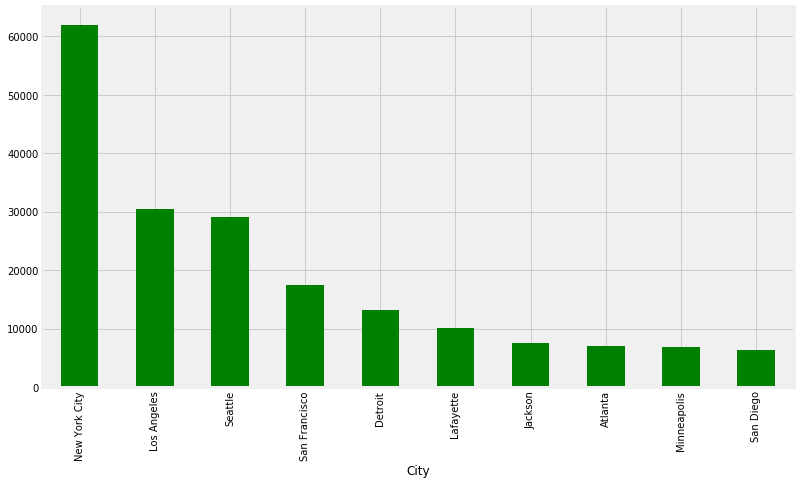

In [85]:
cities = df.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
top = df.groupby('City')['Profit'].sum().nlargest(10)
top.plot(kind='bar', color='g', figsize=(12,7))

In [86]:
cities.tail()

,City,Profit
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485
374,Philadelphia,-13837.7674


#### Observation 11: Maximum profit was from New York City and Least was from Philadelphia

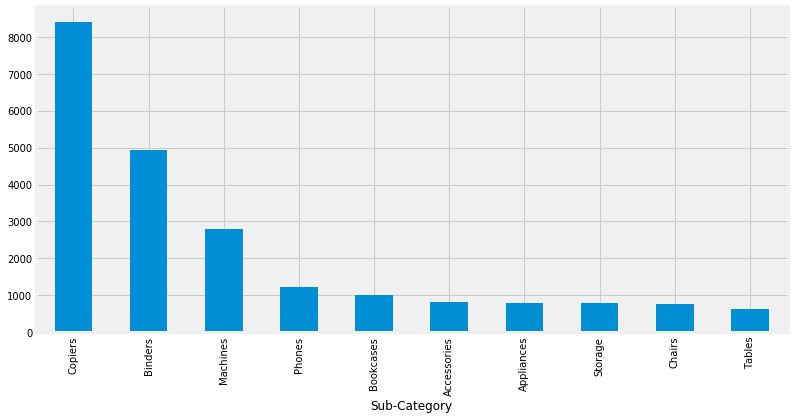

In [87]:
df.groupby('Sub-Category')['Profit'].max().nlargest(10).plot.bar(figsize=(12,6))


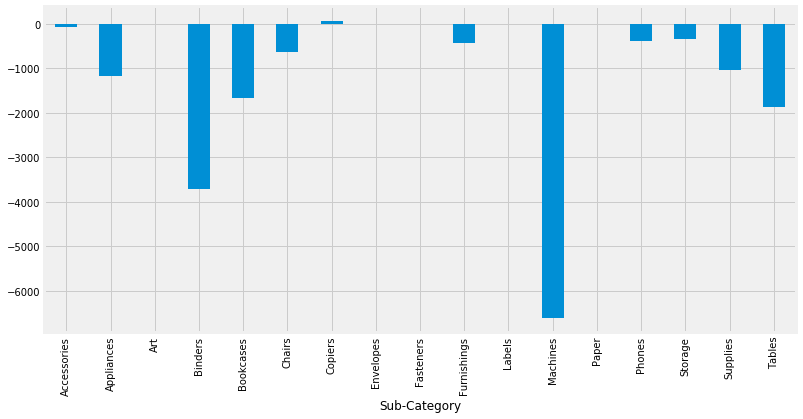

In [99]:
df.groupby('Sub-Category')['Profit'].min().plot.bar(figsize=(12,6))


#### Observation 12: Copiers was the most profitable sub-category.

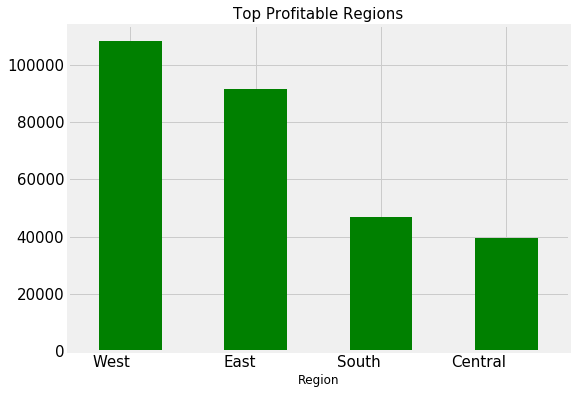

In [63]:
plt.figure(figsize=(8,6))
reg = df.groupby('Region')['Profit'].sum().nlargest(10)
reg.plot(kind='bar', color='g')
plt.title("Top Profitable Regions", size=15)
plt.xticks(rotation=0, ha = 'right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observation 13: Western region was most profitable while central was the least.

Data does not have any null value so data cleaning/filling was not needed
State with the maximum profit - California
State with the minimum profit - Texas
City with the maximum profit - New york city
City with the minimum profit - Philadelphia
The region with maximum profits - West
The region with minimum profits and need attention - Central

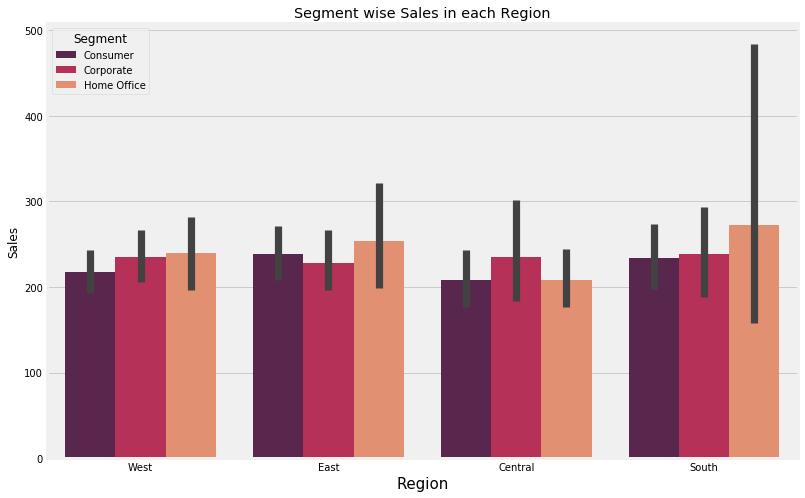

In [68]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

#### Observation 14: Segment wise sales were almost same in all the regions.



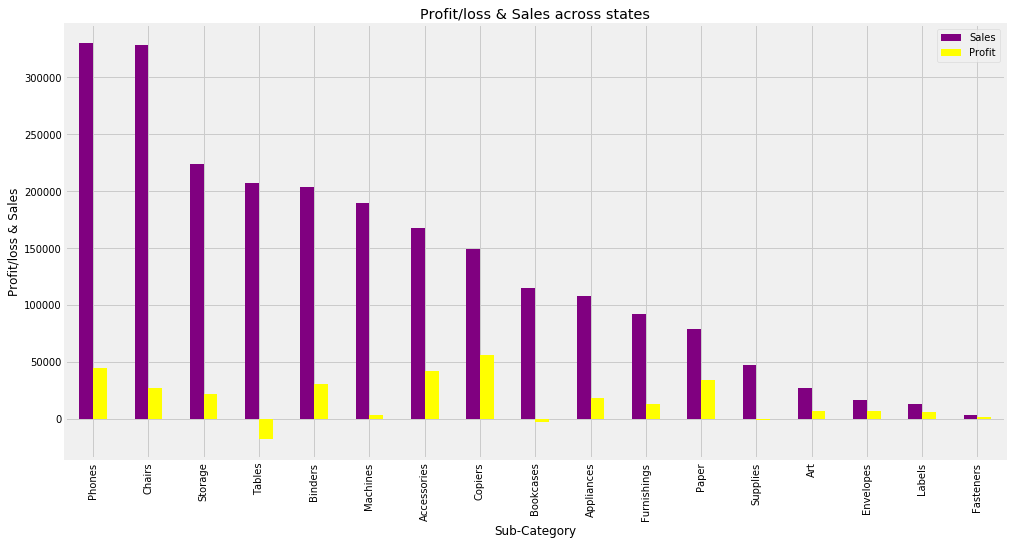

In [88]:
var = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
var[:].plot.bar(color=['purple','yellow'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

#### Observation 15: Phones sub-category have maximum sales.Chairs have equal sales as of Phones but less profit. Tables and Bookcases sub-categories are in deep loss.

# All Observations:

### 1) All the three Segments(Consumer, Corporate and Home Office) were likely to choose the Standard Class as their mode of shipment. Also very few opted the same day delivery as shipment mode.

### 2) California has the highest number of buyers followed by New York and Texas.

### 3) Office Supplies were the most chosen category.

### 4) Western region has the most number of Office supplies while Southern has the least.

### 5) Most of the sales was of Binders and Papers.

### 6) Although, Binders were most sold Sub-Category but in the State of California, It is intresting to note that Papers were most sold Sub-Category.
 
### 7) Technology Category had maximum number of Sales and Furniture least.

### 8) The Profit is only posivtive when the discount is less than 10%. After that, it is not profitable to sell there items with discount more than 10%.

### 9) There is more profit in consumer segment. Focus should also on other segments.

### 10) For maximum sales, discount sholud be less than or equal to 50%.

### 11) Maximum profit was from New York City and Least was from Philadelphia.

### 12) Copiers was the most profitable sub-category. Machines, Binders, Tables, Appliances and Bookcases are sub-categories which needs to be attention more because these are at high loss.

### 13) Western region was most profitable while central was the least.

### 14) Segment wise sales were almost same in all the regions.

### 15) Phones sub-category have maximum sales.Chairs have equal sales as of Phones but less profit. Tables and Bookcases sub-categories are in deep loss.
